In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


## Keras implementation


Keras is a high level API used to construct different neural networks. Users are allowed to use different deep learning libaraies as backend (The actual code that runs the model and computation), such as TensorFlow, CNTK, or Theano.  It is a more straight-forward and user friendly API compared to Tensorflow (without the sessions, placeholder etc). 

## Define Hyperparameters
Hyperparameters are values/parameters set by the user before the learning begins, in a way similar to the input parameters for our physical models. 

In [61]:
batch_size = 64
num_classes = 10
epochs = 5


## Import Dataset
The dataset we are going to use today , MNIST, is one of the standard dataset commonly used for branchmarking, and thus Keras has created dedicated classes to import these standard datasets. 
There are other commonly used datasets, you can find them here:https://keras.io/datasets/

In [62]:
# Keras has made it into a class
from keras.datasets import mnist
## separate data into training set and test set.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [63]:
#lets inspect the shape of each component:
print("Training set:",x_train.shape,"Training Label:",y_train.shape)
print("Test set:",x_test.shape,"Test Label:",y_test.shape)

Training set: (60000, 28, 28) Training Label: (60000,)
Test set: (10000, 28, 28) Test Label: (10000,)


The shape of each train and test set tells us how many 28x28 images are used for training and test, each images will have their own corresponding *labels*.

## Normalise the data
Neural Network works better when the data is normalised. The idea is to put every features (input data into a common scale). It is especially important when the input data has different ranges of values. There are two main reasons for this technique:
1. Un-normalised data will cause the gradient to oscillate back and forth, and the neural network will end up taking longer time to complete the training
The power of neural network relies on its ability to adjust weights, such that it can get closer to the optimum vlaue. The gradient computed at each iteration served as a guiding light for the Neural Network, so that it knows which direction it should move in order to get to the global max/min.
2. Features with higher range (such as income as compared to age), will dominate the learning as it will have the highest variation when we change the weight. Normalising the features can put every features on the same ground and thus each of them will be considered equally.

One of the most common normalisation techniques is to normalise the feature range to [0,1]. 
$$y = \frac{x - x_{min}}{x_{max}-x_{min}}$$

In [64]:
x_train = (x_train - x_train.min())/(x_train.max() - x_train.min())
x_test = (x_test - x_test.min())/(x_test.max() - x_test.min())

In [65]:
## check the maximum and minimum:
x_train.max(),x_train.min(),x_test.max(),x_test.min()

(1.0, 0.0, 1.0, 0.0)

## Prepare the dataformat for Keras

In [66]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
## turn them into one-hot vector
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
#further divides training data into training and validation data
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=42)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


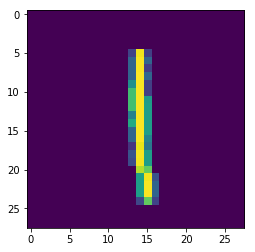

In [69]:
plt.imshow(X_train[0].reshape(28,28))
print(Y_train[0])

## Define the model

In [9]:
model = Sequential()
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


## Construct and Run

In [9]:
history = model.fit(X_train,Y_train,batch_size=batch_size,
                                     epochs=epochs,
                                     verbose=1,
                                     validation_data=(X_val, Y_val), shuffle=True)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 11s 201us/step - loss: 0.3514 - acc: 0.9048 - val_loss: 0.1367 - val_acc: 0.9642
Epoch 2/5
54000/54000 [==============================] - 10s 190us/step - loss: 0.1821 - acc: 0.9611 - val_loss: 0.1397 - val_acc: 0.9733
Epoch 3/5
54000/54000 [==============================] - 11s 203us/step - loss: 0.1630 - acc: 0.9669 - val_loss: 0.1514 - val_acc: 0.9742
Epoch 4/5
54000/54000 [==============================] - 12s 224us/step - loss: 0.1541 - acc: 0.9715 - val_loss: 0.2024 - val_acc: 0.9678
Epoch 5/5
54000/54000 [==============================] - 10s 187us/step - loss: 0.1614 - acc: 0.9731 - val_loss: 0.1995 - val_acc: 0.9703


## Evaluate Performance on the test data

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21180870634457583
Test accuracy: 0.9695


## Tensorboard

In the last section we have used Tensorboard to look at some simple computation graph. Keras provided a simple functionality to incorporate our model into Tensorboard. It can be used to monitor the training process, the entire architecture of the deep learning model and their associated weights, and many more: check out this link:
https://keras.io/callbacks/

In [28]:
## initialise tensorboard call back object
csvlogger = keras.callbacks.CSVLogger("./Graph/training_log.csv", separator=',', append=False)


tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', 
                                         histogram_freq=1, 
                                         write_graph=True, 
                                         write_images=False,update_freq='epoch',batch_size=batch_size)

history = model.fit(X_train,Y_train,batch_size=batch_size,
                                     epochs=epochs,
                                     verbose=1,
                                     validation_data=(X_val, Y_val), shuffle=True,callbacks=[tbCallBack,csvlogger])

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 10s 191us/step - loss: 0.1557 - acc: 0.9816 - val_loss: 0.2170 - val_acc: 0.9795
Epoch 2/5
54000/54000 [==============================] - 8s 153us/step - loss: 0.1565 - acc: 0.9815 - val_loss: 0.2693 - val_acc: 0.9770
Epoch 3/5
54000/54000 [==============================] - 9s 158us/step - loss: 0.1635 - acc: 0.9830 - val_loss: 0.2691 - val_acc: 0.9767
Epoch 4/5
54000/54000 [==============================] - 9s 165us/step - loss: 0.1450 - acc: 0.9834 - val_loss: 0.2931 - val_acc: 0.9758
Epoch 5/5
54000/54000 [==============================] - 9s 158us/step - loss: 0.1481 - acc: 0.9832 - val_loss: 0.2775 - val_acc: 0.9743


# What about Tensorflow?


We have been talking about PyTorch, Keras etc, but where is Tensorflow ?
Tensorflow implementation is actually less straight forward. As you have seen in the previous seminar, to run a deep learning model we will need to the following:
1. Define the variables (placeholders) for any input to the computational graph
2. Define the computational graph ( in this case, our deep learning model)
3. Define the loss function and optimizer
4. Start a session and train it


## Import module

In [14]:
import tensorflow as tf
## Tensorflow has also created a module for MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data


In [17]:
## load the data, set one hot to True, similar to what we did in keras.utils.to_categorical
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)



Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


## Hyperparameters

In [21]:
## number of nodes for different hidden layers
n_nodes_hl1 = 1024
n_nodes_hl2 = 512
n_nodes_hl3 = 128

## Hyperparameters for training
n_classes = 10
batch_size = 100

In [24]:
## Define our variables. 784 is the flatten version of the 28x28 image
input_data = tf.placeholder('float', [None, 784])
target = tf.placeholder('float')



## Define the Neural Network Model

In [20]:
def neural_network_model(data):
    #initialise weights for different hidden layers
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([784, n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                    'biases':tf.Variable(tf.random_normal([n_classes])),}


    layer1 = tf.add(tf.matmul(data,hidden_1_layer['weights']), hidden_1_layer['biases'])
    layer1 = tf.nn.relu(layer1)

    layer2 = tf.add(tf.matmul(layer1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    layer2 = tf.nn.relu(layer2)

    layer3 = tf.add(tf.matmul(layer2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    layer3 = tf.nn.relu(layer3)

    output = tf.matmul(layer3,output_layer['weights']) + output_layer['biases']

    return output



In [26]:

prediction = neural_network_model(input_data)
# OLD VERSION:
#cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(prediction,y) )
# NEW:
cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=target) )
optimizer = tf.train.AdamOptimizer().minimize(cost)

hm_epochs = 10
with tf.Session() as sess:
    # OLD:
    #sess.run(tf.initialize_all_variables())
    # NEW:
    sess.run(tf.global_variables_initializer())
    ## epochs, number of times NN will see the data
    for epoch in range(hm_epochs):
        epoch_loss = 0
        for _ in range(int(mnist.train.num_examples/batch_size)):
            epoch_x, epoch_y = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={input_data: epoch_x, target: epoch_y})
            epoch_loss += c

        print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)

    correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(target, 1))

    accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
    print('Accuracy:',accuracy.eval({input_data:mnist.test.images, target:mnist.test.labels}))



Epoch 0 completed out of 10 loss: 1680689.5903320312
Epoch 1 completed out of 10 loss: 391256.8142089844
Epoch 2 completed out of 10 loss: 217650.83019399643
Epoch 3 completed out of 10 loss: 129485.53441876173
Epoch 4 completed out of 10 loss: 79209.29220227778
Epoch 5 completed out of 10 loss: 49299.8393509388
Epoch 6 completed out of 10 loss: 32981.79262545705
Epoch 7 completed out of 10 loss: 25062.074311968838
Epoch 8 completed out of 10 loss: 21279.05865962361
Epoch 9 completed out of 10 loss: 19255.72293722272
Accuracy: 0.9516


# Keras or Tensorflow? Why not both?

## Tensorflow 2-Alpha

Tensorflow 2 is a major update from the Tensforflow team. As quoted from the website, "TensorFlow 2.0 focuses on simplicity and ease of use, with updates like eager execution, intuitive higher-level APIs, and flexible model building on any platform.", lets have a look at the implementation from Tensorflow 2

In [ ]:
## import modules
#from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
#!pip install -q tensorflow==2.0.0-alpha0

#import tensorflow as tf

## load data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

## Examples of using AI in the field of astronomy


https://iopscience.iop.org/article/10.3847/1538-3881/aa9e09/pdf
    